# **Final Project Task 2 - Census EDA**

Requirements

- Analyze hours-per-week Target Distribution **1p**
    - Provide visualizations like histograms or density plots for hours-per-week to assess its distribution, outliers, and skewness.

- Provide a summary of the dataset using descriptive statistics, such as mean, median, and standard deviation. **1p**

- Check for missing values and report the number and percentage of missing data for each column. **1p**

- Identify outliers in at least one numerical column using boxplots. **1p**

- Write a summary report of your findings from the EDA, highlighting key patterns or trends, unexpected insights or anomalies, and areas requiring further investigation. **1p**


- Plot histograms for at least three numerical columns and discuss their distributions, such as skewness and modality. - Optional

- Generate bar plots for at least three categorical columns and discuss the frequency distributions. - Optional

- Create a correlation matrix for target hours-per-week and the rest of numerical variables and discuss the strongest and weakest correlations with the target. - Optional

- Explore relationships between at least one numerical variable and hours-per-week target using scatter plots and identify any visible trends. Choose the variable that is/are most correlated with hours-per-week. - Optional

- Analyze the relationship between hours-per-week and all categorical variable using boxplots or violin plots. - Optional

- At the end, do the same analysis for the preprocessed dataset (just change the input data in the EDA), and write a report. - Optional

- Others? - Optional


Deliverable:

- Notebook code with no errors.
- Include all visuals from the requirements in the notebook: graphs, plots, histograms, heatmap etc
- Be sure to discuss the findings and add a summary report

In [6]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

data = pd.read_csv(data_url, header=None, names=columns, na_values=" ?", skipinitialspace=True)
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
3280,27,Private,386036,Some-college,10,Never-married,Transport-moving,Not-in-family,White,Male,0,0,48,United-States,<=50K
22539,31,Private,156763,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,2829,0,40,United-States,<=50K
3487,44,Private,54507,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
11867,26,Private,101812,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,5721,0,40,United-States,<=50K
22712,28,Private,181776,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
18938,44,Federal-gov,244054,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Male,0,0,60,United-States,>50K
1075,19,Self-emp-not-inc,36012,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,20,United-States,<=50K
5391,31,Private,101562,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,55,United-States,<=50K
6935,60,?,191118,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,1848,40,United-States,>50K
8077,43,State-gov,230961,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def perform_complete_eda(data, target_column='hours-per-week'):
    """
    Perform complete EDA on a dataset
    """
    print("=" * 80)
    print("COMPREHENSIVE EDA REPORT")
    print("=" * 80)
    
    # 1. Basic Info
    print(f"\n1. DATASET INFO:")
    print(f"   Shape: {data.shape}")
    print(f"   Columns: {len(data.columns)}")
    print(f"   Memory usage: {data.memory_usage().sum() / 1024**2:.2f} MB")
    
    # 2. Target Analysis
    print(f"\n2. TARGET ANALYSIS ({target_column}):")
    target_stats = data[target_column].describe()
    print(f"   Mean: {target_stats['mean']:.2f}")
    print(f"   Median: {target_stats['50%']:.2f}")
    print(f"   Std: {target_stats['std']:.2f}")
    print(f"   Range: [{target_stats['min']:.2f}, {target_stats['max']:.2f}]")
    print(f"   IQR: {target_stats['75%'] - target_stats['25%']:.2f}")
    
    # 3. Missing Values
    print(f"\n3. MISSING VALUES:")
    missing = data.isnull().sum()
    missing_pct = (missing / len(data)) * 100
    missing_df = pd.DataFrame({'Missing': missing, 'Percentage': missing_pct})
    missing_df = missing_df[missing_df['Missing'] > 0]
    
    if len(missing_df) > 0:
        for idx, row in missing_df.iterrows():
            print(f"   {idx}: {row['Missing']} values ({row['Percentage']:.1f}%)")
    else:
        print("   No missing values found")
    
    # 4. Data Types
    print(f"\n4. DATA TYPES:")
    dtypes = data.dtypes.value_counts()
    for dtype, count in dtypes.items():
        print(f"   {dtype}: {count} columns")
    
    return {
        'shape': data.shape,
        'target_stats': target_stats,
        'missing_values': missing_df,
        'dtypes': dtypes
    }

# Run the EDA
eda_results = perform_complete_eda(data, 'hours-per-week')

COMPREHENSIVE EDA REPORT

1. DATASET INFO:
   Shape: (32561, 15)
   Columns: 15
   Memory usage: 3.73 MB

2. TARGET ANALYSIS (hours-per-week):
   Mean: 40.44
   Median: 40.00
   Std: 12.35
   Range: [1.00, 99.00]
   IQR: 5.00

3. MISSING VALUES:
   No missing values found

4. DATA TYPES:
   str: 9 columns
   int64: 6 columns



1. TARGET VARIABLE ANALYSIS: hours-per-week


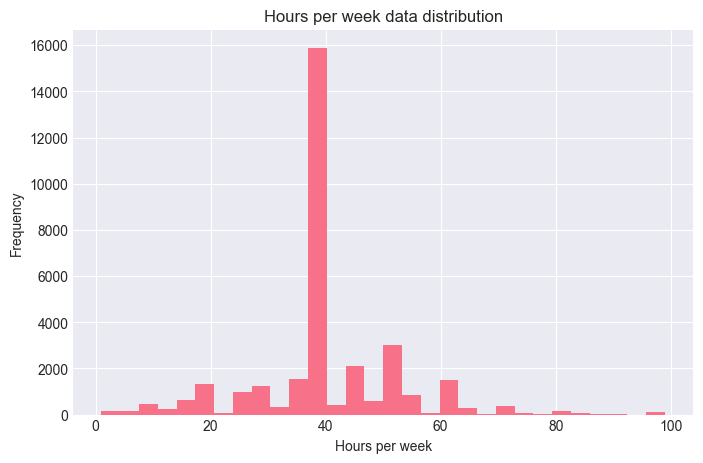

In [9]:
print("\n" + "=" * 80)
print("1. TARGET VARIABLE ANALYSIS: hours-per-week")
print("=" * 80)


plt.figure(figsize=(8,5))
plt.hist(data['hours-per-week'], bins=30)
plt.xlabel('Hours per week')
plt.ylabel('Frequency')
plt.title('Hours per week data distribution')
plt.show()



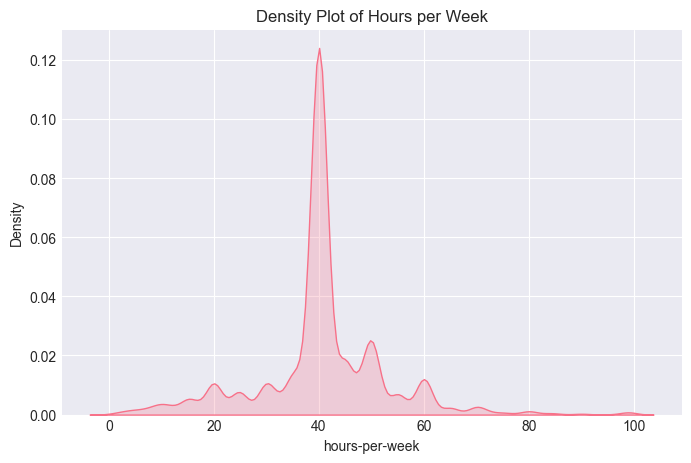

In [10]:
plt.figure(figsize=(8,5))
sns.kdeplot(data['hours-per-week'], fill=True)
plt.title('Density Plot of Hours per Week')
plt.show()

In [11]:
data["hours-per-week"].describe()



count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

Datele analizate provin de la 32.561 de persoane, pentru care durata medie a programului de lucru este de 40,4 ore săptămânal, mediana este de 40 ore, confirmând tendința.

Majoritatea covârșitoare a persoanelor lucrează 40 de ore pe săptămână (norma întreagă standard). Distribuția este înclinată ușor spre dreapta, indicând existența unui grup minoritar care depășește semnificativ norma standard

    Variația moderată (deviația standard de 12,3 ore) sugerează diferențe considerabile între programele individuale

Se remarcă posibili outliers la un minim: 1 oră/săptămână și un maxim de 99 de ore/săptămână. 

În ceea ce priveste structura distribuției 25% din persoane lucrează până la 40 de ore, 50% lucrează exact 40 de ore.



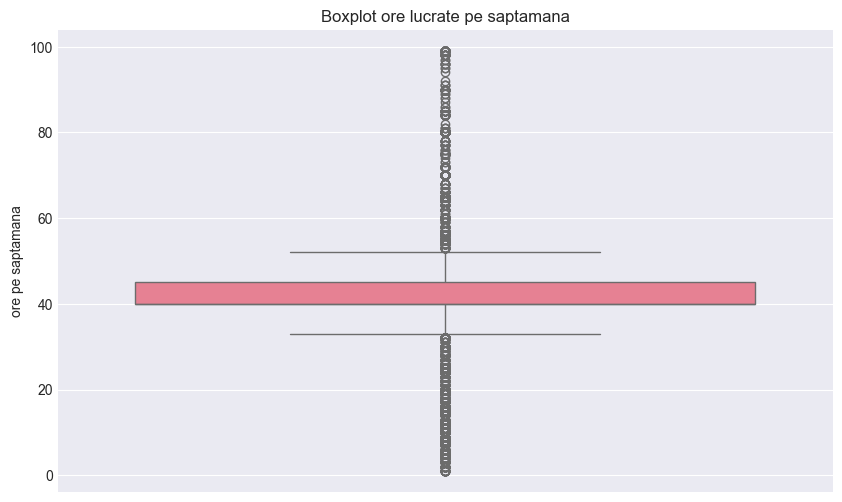

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data["hours-per-week"])
plt.title("Boxplot ore lucrate pe saptamana")
plt.ylabel("ore pe saptamana")
plt.show()

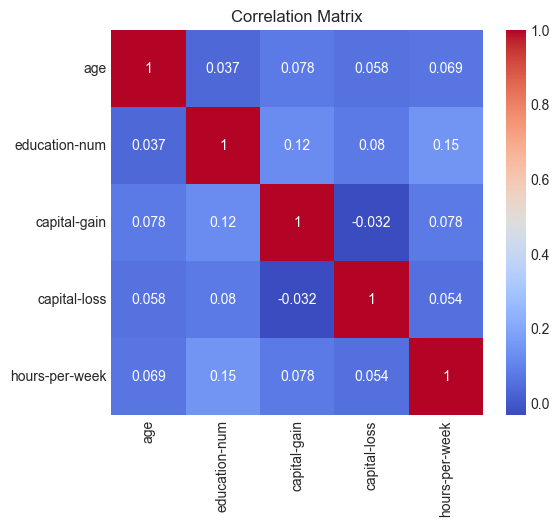

In [13]:
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

corr = data[numerical_columns].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

CORRELATION ANALYSIS: hours-per-week vs Numerical Variables

1. COMPLETE CORRELATION MATRIX:
--------------------------------------------------
                  age  fnlwgt  education-num  capital-gain  capital-loss  \
age             1.000  -0.077          0.037         0.078         0.058   
fnlwgt         -0.077   1.000         -0.043         0.000        -0.010   
education-num   0.037  -0.043          1.000         0.123         0.080   
capital-gain    0.078   0.000          0.123         1.000        -0.032   
capital-loss    0.058  -0.010          0.080        -0.032         1.000   
hours-per-week  0.069  -0.019          0.148         0.078         0.054   

                hours-per-week  
age                      0.069  
fnlwgt                  -0.019  
education-num            0.148  
capital-gain             0.078  
capital-loss             0.054  
hours-per-week           1.000  


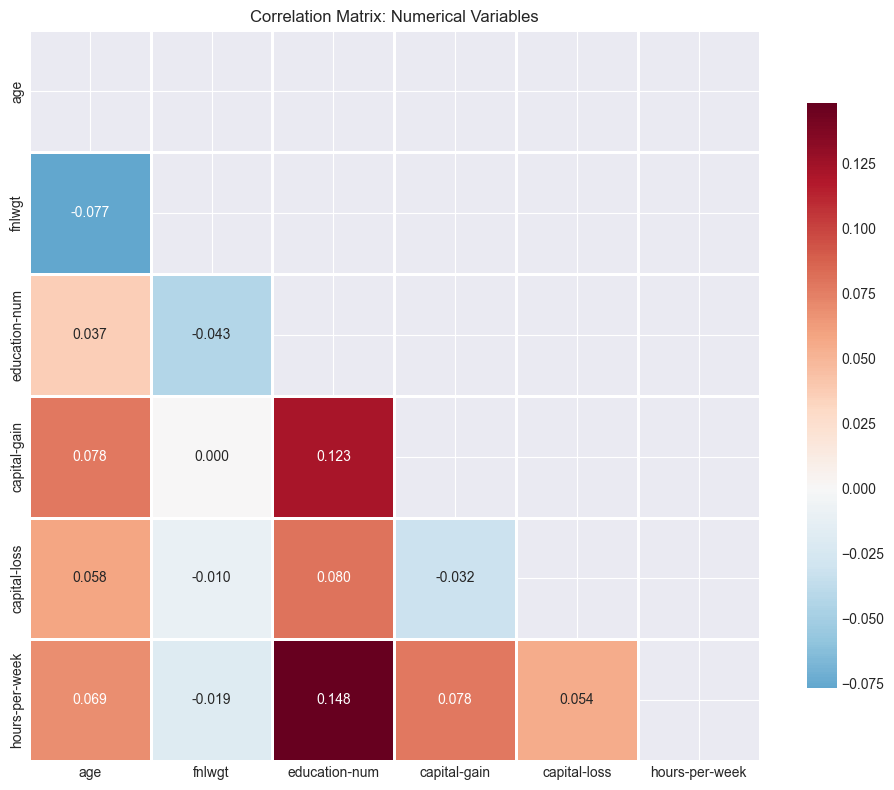


2. CORRELATIONS WITH TARGET VARIABLE (hours-per-week):
--------------------------------------------------
Variable           Correlation    Strength
--------------------------------------------------
education-num          0.1481       Weak (positive)
capital-gain           0.0784       Very Weak (positive)
age                    0.0688       Very Weak (positive)
capital-loss           0.0543       Very Weak (positive)
fnlwgt                -0.0188       Very Weak (negative)

3. STATISTICAL SIGNIFICANCE OF CORRELATIONS:
--------------------------------------------------
Variable           p-value       Significant?
--------------------------------------------------
education-num        0.000000       Yes
capital-gain         0.000000       Yes
age                  0.000000       Yes
capital-loss         0.000000       Yes
fnlwgt               0.000707       Yes


In [15]:
import matplotlib.pyplot as plt
from scipy import stats

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 80)
print("CORRELATION ANALYSIS: hours-per-week vs Numerical Variables")
print("=" * 80)

# Identify numerical variables
numerical_vars = ['age', 'fnlwgt', 'education-num', 'capital-gain', 
                  'capital-loss', 'hours-per-week']

# Create correlation matrix
corr_matrix= data[numerical_vars].corr()

print("\n1. COMPLETE CORRELATION MATRIX:")
print("-" * 50)
print(corr_matrix.round(3))

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', 
            center=0, square=True, linewidths=1, 
            cbar_kws={"shrink": 0.8}, fmt='.3f')
plt.title('Correlation Matrix: Numerical Variables')
plt.tight_layout()
plt.show()

# Extract correlations with target
target_correlations = corr_matrix['hours-per-week'].drop('hours-per-week')
target_correlations = target_correlations.sort_values(key=abs, ascending=False)

print("\n2. CORRELATIONS WITH TARGET VARIABLE (hours-per-week):")
print("-" * 50)
print("Variable           Correlation    Strength")
print("-" * 50)

# Define correlation strength categories
def get_correlation_strength(corr_value):
    abs_corr = abs(corr_value)
    if abs_corr >= 0.7:
        return "Very Strong"
    elif abs_corr >= 0.5:
        return "Strong"
    elif abs_corr >= 0.3:
        return "Moderate"
    elif abs_corr >= 0.1:
        return "Weak"
    else:
        return "Very Weak"

for var, corr in target_correlations.items():
    strength = get_correlation_strength(corr)
    direction = "positive" if corr > 0 else "negative"
    print(f"{var:20} {corr:8.4f}       {strength} ({direction})")

# Statistical significance testing
print("\n3. STATISTICAL SIGNIFICANCE OF CORRELATIONS:")
print("-" * 50)
print("Variable           p-value       Significant?")
print("-" * 50)

for var in target_correlations.index:
    if var != 'hours-per-week':
        corr_coef, p_value = stats.pearsonr(data[var].dropna(),data['hours-per-week'].dropna())
        significant = "Yes" if p_value < 0.05 else "No"
        print(f"{var:20} {p_value:8.6f}       {significant}")

Toate variabilele prezintă corelații semnificative din punct de vedere statistic (p < 0,001), ceea ce înseamnă că este foarte puțin probabil ca aceste relații să fie întâmplătoare.
Cu toate acestea, toate corelațiile sunt mai degrabă slabe.
Educația are cea mai puternică relație cu programul de lucru, dar este totuși o corelație moderată.


In [ ]:
def categorize_education(edu):
    """
    Categorize education into 3 broad categories:
    1. Elementary: Preschool through 8th grade
    2. High_School: 9th through 12th grade + HS-grad
    3. College: Some college, Associates, Bachelors, Masters, Doctorate
    """
    if edu in ['Preschool', '1st-4th', '5th-6th', '7th-8th']:
        return 'Elementary'
    elif edu in ['9th', '10th', '11th', '12th', 'HS-grad']:
        return 'High_School'
    elif edu in ['Some-college', 'Assoc-voc', 'Assoc-acdm', 
                 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']:
        return 'College'
    else:
        return 'Unknown'  # Fallback for any unexpected values

# Apply to your DataFrame
data['education_categories'] = data['education'].apply(categorize_education)

print("\n" + "=" * 50)
print("MAPPING DETAILS:")
print("=" * 50)

# Show what goes into each category
mapping = {
    'Elementary': ['Preschool', '1st-4th', '5th-6th', '7th-8th'],
    'High_School': ['9th', '10th', '11th', '12th', 'HS-grad'],
    'College': ['Some-college', 'Assoc-voc', 'Assoc-acdm', 
                'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
}

for category, values in mapping.items():
    print(f"\n{category}:")
    for value in values:
        if value in data['education'].unique():
            count = (data['education'] == value).sum()
            print(f"  - {value}")


MAPPING DETAILS:

Elementary:
  - Preschool
  - 1st-4th
  - 5th-6th
  - 7th-8th

High_School:
  - 9th
  - 10th
  - 11th
  - 12th
  - HS-grad

College:
  - Some-college
  - Assoc-voc
  - Assoc-acdm
  - Bachelors
  - Masters
  - Prof-school
  - Doctorate


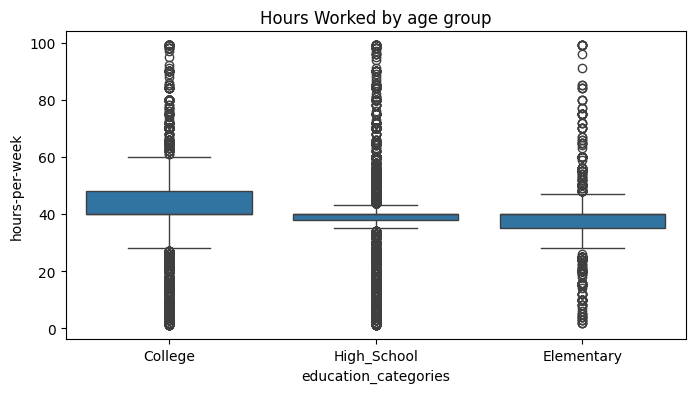

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='education_categories', y='hours-per-week', data=data)
plt.title('Hours Worked by age group')
plt.show()



Persoanele cu studii superioare și postliceale tind să aibă programe mai stabile și preponderant de normă întreagă.
Categoria persoanelor care au doar studii liceale este cea mai eterogenă, cu o gamă largă de situații ocupationale.

Oamenii care au absolvit doar ciclul de educație primară pare asociat cu programe de lucru relativ constante.

Putem deduce că nivelul educațional influențează tiparul programului de lucru, iar persoanele cu studii medii sunt predispuse la un program neomogen. Stabliatea ocupatională crește odată cu nivelul educațional.